In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
    user='root',
    password='123456',
    host='localhost',
    database='ecommerce'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
#printing first 5 records from each table
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

# ○ Identify the total number of customers City wise.

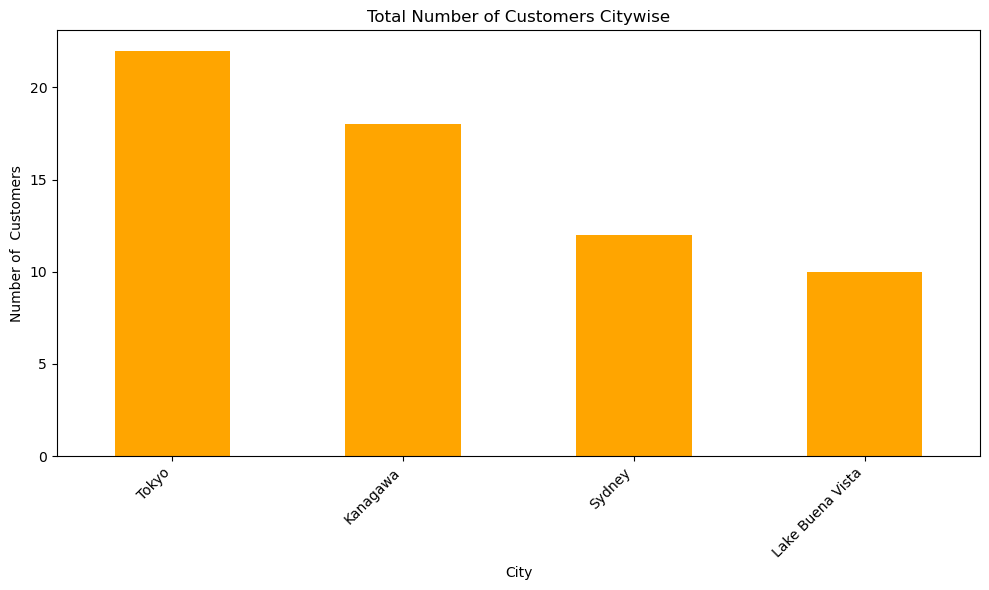

In [114]:
city_counts= customer_data['city'].value_counts()

  #Ploting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color= 'orange')
plt.title('Total Number of Customers Citywise')
plt.xlabel('City')
plt.ylabel('Number of  Customers')
plt.xticks(rotation=45, ha= 'right') # Rotate city names for better readability
plt.tight_layout()   # Adjust layout to prevent clipping of labels
plt.show()

# Identify the most frequent customers based on their order history.

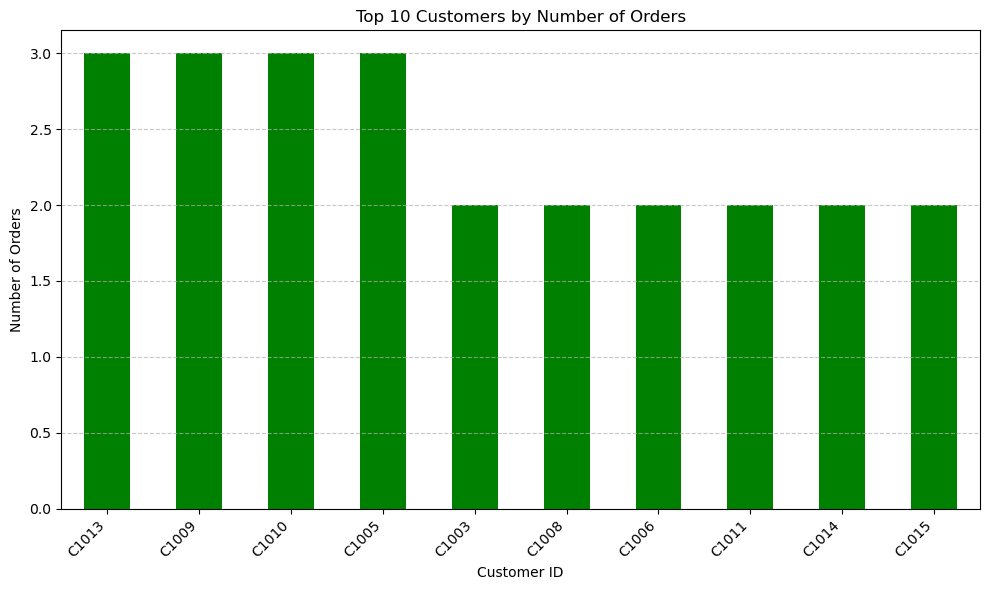

In [117]:
# Calculate the number of orders for each customer
customer_order_counts = order_data['customer_id'].value_counts()

# Select the top 10 customers with the highest number of orders
top_10_customers = customer_order_counts.head(10)

# Create a bar plot to visualize the number of orders for each customer
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


# ○ Determine the total number of products available by category.

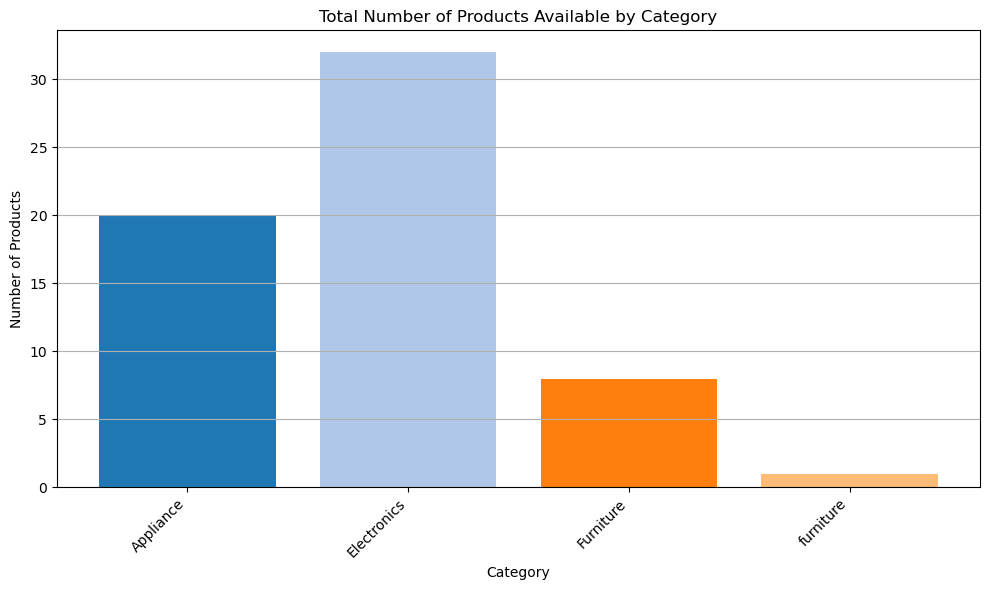

In [125]:
# Calculate the total number of products available in each category
products_by_category = product_data['category'].value_counts()

# Sort the categories alphabetically
products_by_category = products_by_category.sort_index()

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(products_by_category.index, products_by_category.values, color=plt.cm.tab20.colors)
plt.title('Total Number of Products Available by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()
plt.show()



# Analyze the distribution of products across sub-categories

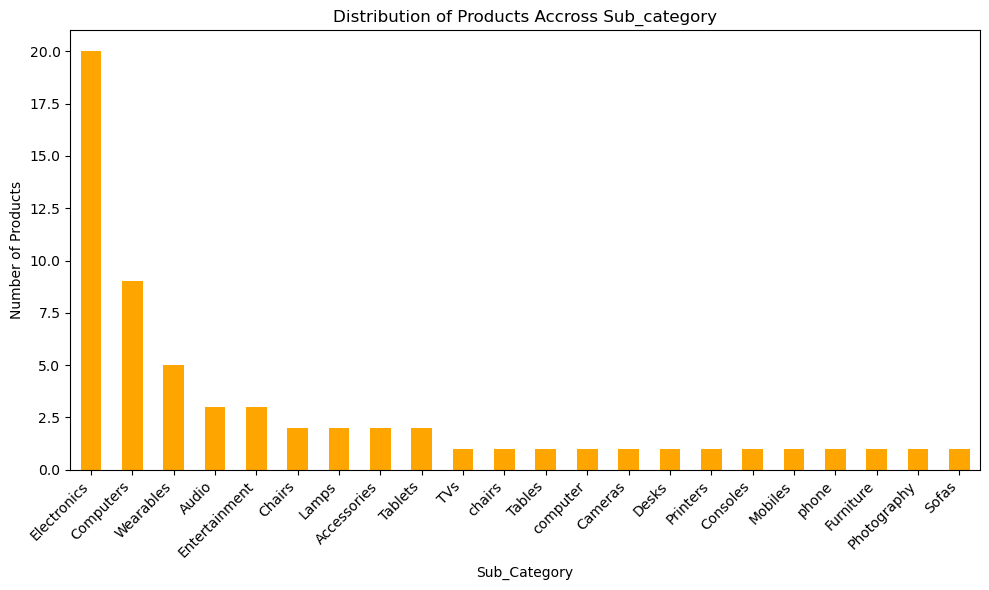

In [124]:
# Total numbers of product in category
city_counts = product_data['sub_category'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10,6))
city_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Products Accross Sub_category')
plt.xlabel('Sub_Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha= 'right')
plt.tight_layout()
plt.show()

# ○ Identify products with low stock levels.

<Figure size 1000x600 with 0 Axes>

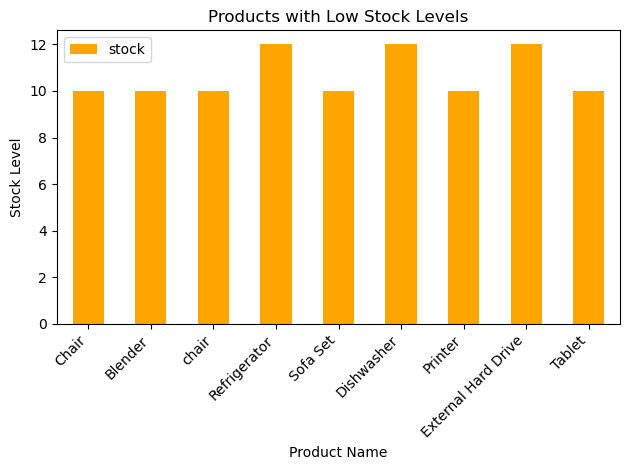

In [33]:
# Filter products with low stock levels (for example, below 15)
low_stock_products = product_data[product_data['stock'] < 15]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
low_stock_products.plot(kind='bar', x='product_name', y='stock', color='orange')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Calculate the average, maximum, and minimum selling prices for products

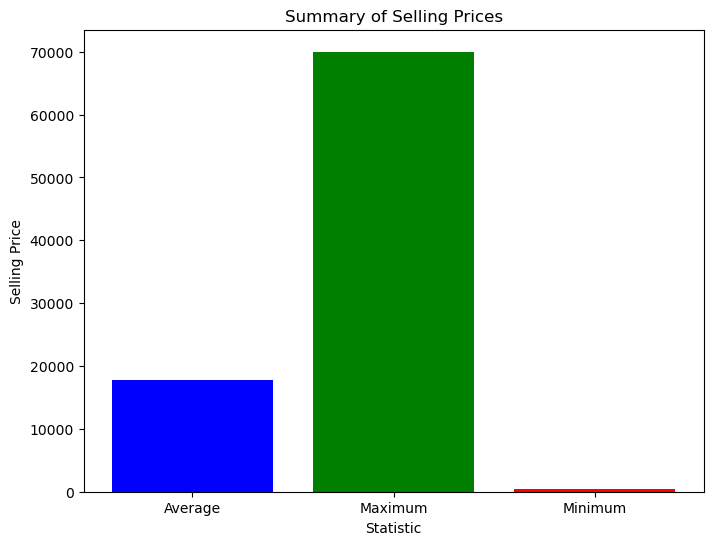

In [34]:
# Calculate average, maximum, and minimum selling prices
average_selling_price = product_data['selling_price'].mean()
maximum_selling_price = product_data['selling_price'].max()
minimum_selling_price = product_data['selling_price'].min()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_selling_price, maximum_selling_price, minimum_selling_price], color=['blue', 'green', 'red'])
plt.title('Summary of Selling Prices')
plt.xlabel('Statistic')
plt.ylabel('Selling Price')
plt.show()


# ● Order Analysis:


# ○ Calculate the top 10 orders product wise

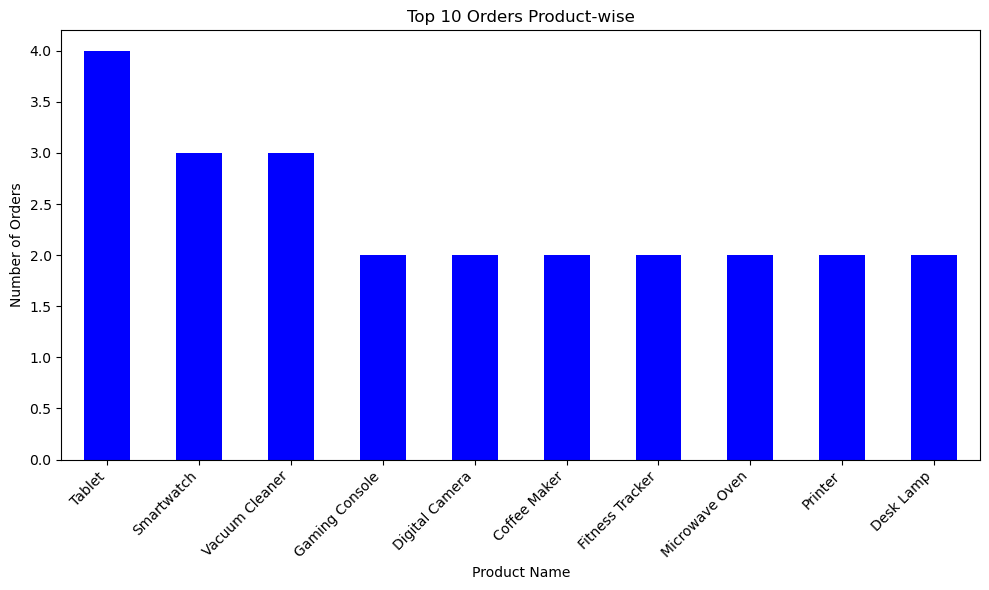

In [49]:
top_10_orders = product_data['product_name'].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(10,6))
top_10_orders.plot(kind='bar', color='blue')
plt.title('Top 10 Orders Product-wise')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ○ Analyze the order status distribution (e.g., pending, delivered).

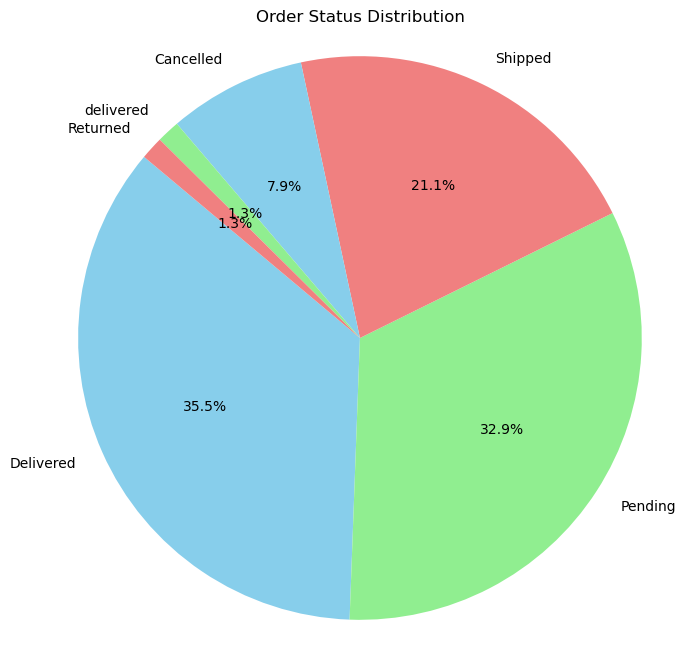

In [52]:
# Count the number of orders for each status
order_status_counts = order_data['order_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Order Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# ○ Identify the most popular products based on order quantity.

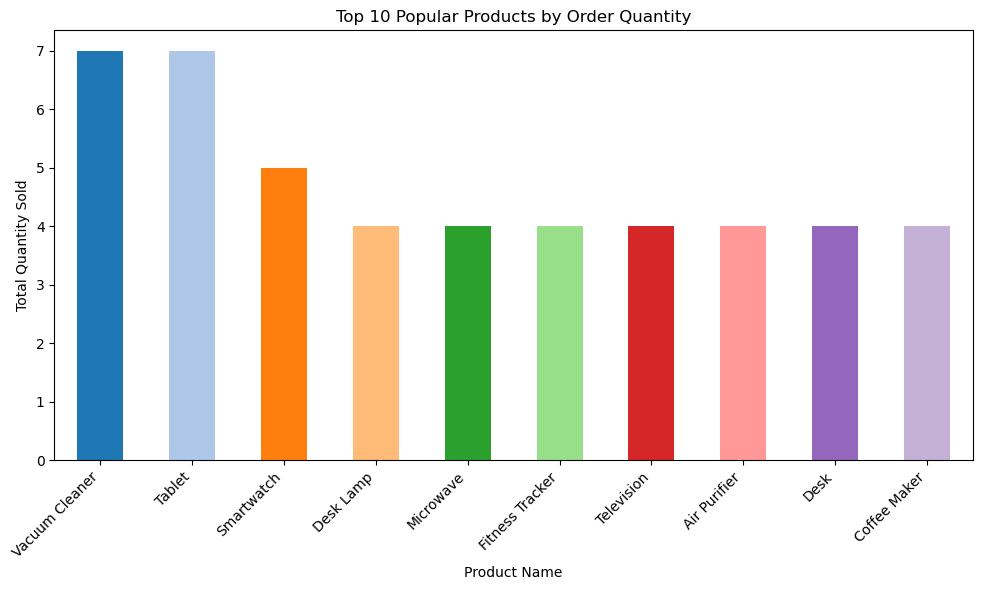

In [128]:
import matplotlib.pyplot as plt

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color=plt.cm.tab20.colors)
plt.title('Top 10 Popular Products by Order Quantity')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ● Sales Analysis: ○ Calculate total revenue generated from orders product wise

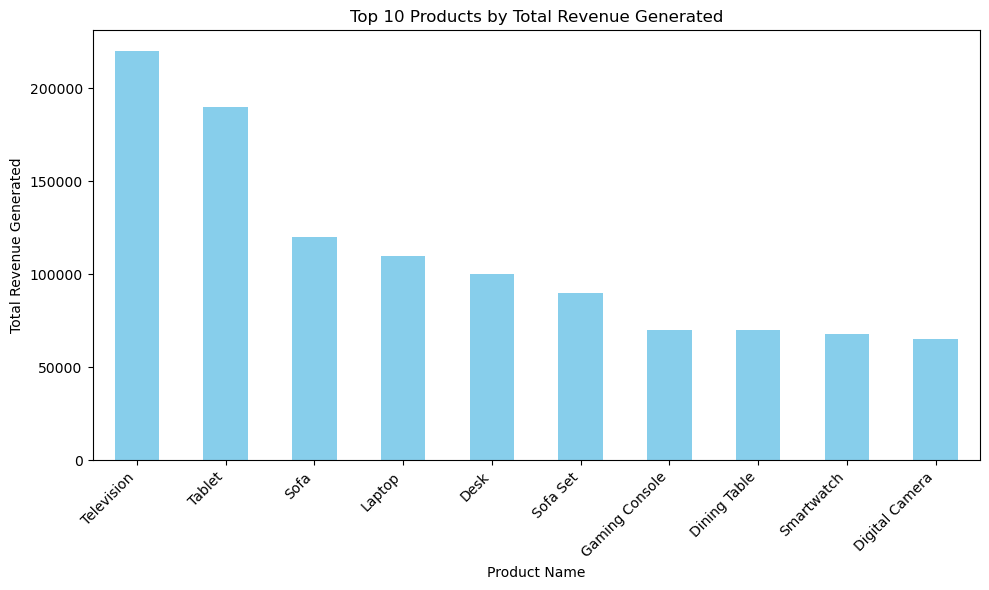

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge order data with product data based on product ID
merged_data = pd.merge(order_data, product_data, on='product_id')

# Calculate revenue for each order
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

# Group merged data by product name and sum the revenues
product_revenue = merged_data.groupby('product_name')['revenue'].sum()

# Sort products based on total revenue generated
top_products_revenue = product_revenue.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue Generated')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Calculate total revenue product category wise percentage

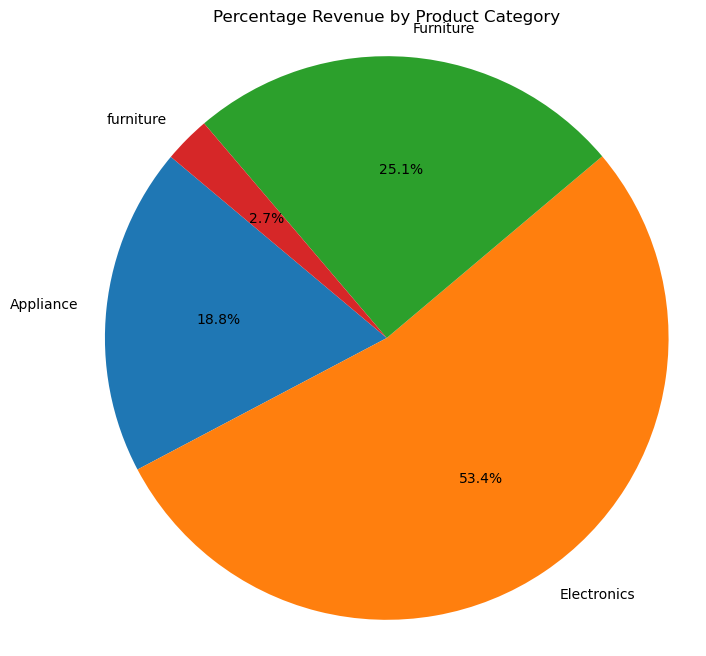

In [78]:
import matplotlib.pyplot as plt

# Merge the category column from product_data into merged_data
merged_data = pd.merge(merged_data, product_data[['product_id', 'category']], on='product_id')

# Group merged data by product category and sum the revenues
category_revenue = merged_data.groupby('category')['revenue'].sum()

# Calculate total revenue across all categories
total_revenue = category_revenue.sum()

# Calculate percentage revenue for each category
category_revenue_percentage = (category_revenue / total_revenue) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Revenue by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Calculate the total revenue generated from all orders

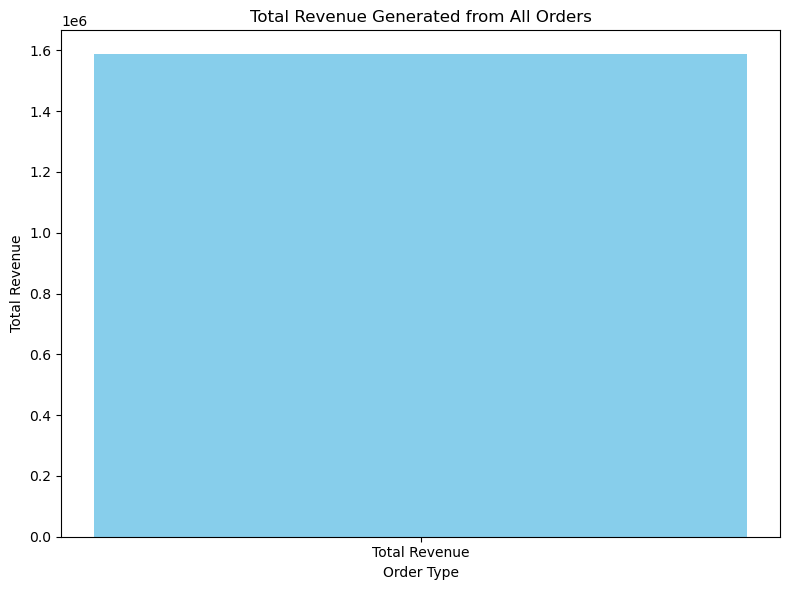

In [83]:
import matplotlib.pyplot as plt

# Calculate total revenue generated from all orders
total_revenue_all_orders = order_data['total_price'].sum()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue')
plt.xlabel('Order Type')

plt.tight_layout()
plt.show()


# Identify the most profitable products based on the difference between original and selling prices.

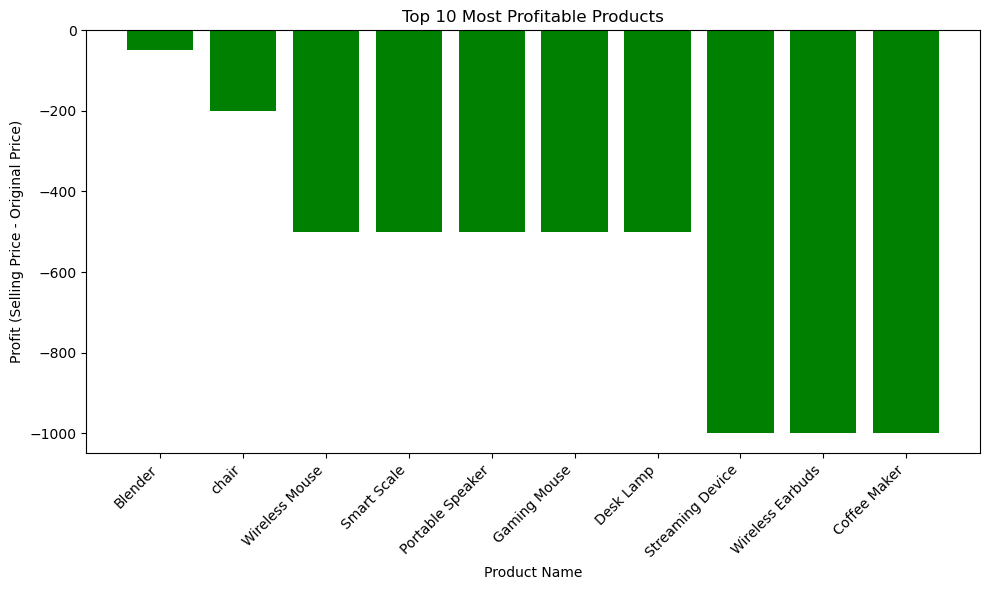

In [84]:
import matplotlib.pyplot as plt

# Calculate the profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

# Sort products based on profit
most_profitable_products = product_data.sort_values(by='profit', ascending=False).head(10)

# Create a bar chart to visualize the most profitable products
plt.figure(figsize=(10, 6))
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price - Original Price)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# ● Customer Order Patterns:
○ Identify product names with the highest and lowest order quantities.

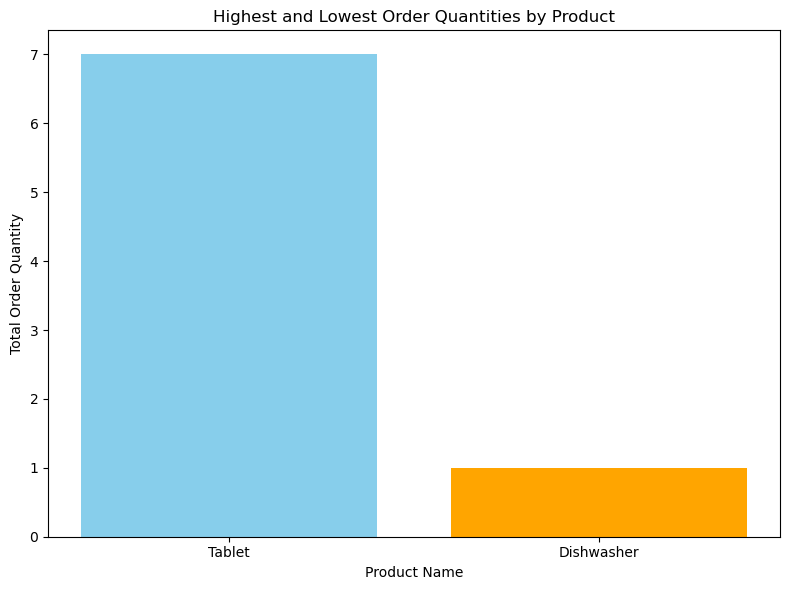

Product with the highest order quantity: Tablet
Highest order quantity: 7.0
Product with the lowest order quantity: Dishwasher
Lowest order quantity: 1.0


In [129]:
# Merge order_data with product_data on 'product_id'
merged_data = pd.merge(order_data, product_data, on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Identify product with the highest order quantity
highest_quantity_product = product_quantity_sold.idxmax()
highest_quantity = product_quantity_sold.max()

# Identify product with the lowest order quantity
lowest_quantity_product = product_quantity_sold.idxmin()
lowest_quantity = product_quantity_sold.min()

# Create a bar plot for highest and lowest order quantities
plt.figure(figsize=(8, 6))
plt.bar([highest_quantity_product, lowest_quantity_product], [highest_quantity, lowest_quantity], color=['skyblue', 'orange'])
plt.title('Highest and Lowest Order Quantities by Product')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')

plt.tight_layout()
plt.show()

print("Product with the highest order quantity:", highest_quantity_product)
print("Highest order quantity:", highest_quantity)
print("Product with the lowest order quantity:", lowest_quantity_product)
print("Lowest order quantity:", lowest_quantity)


# Identify customers with the highest and lowest order quantities by customer name.

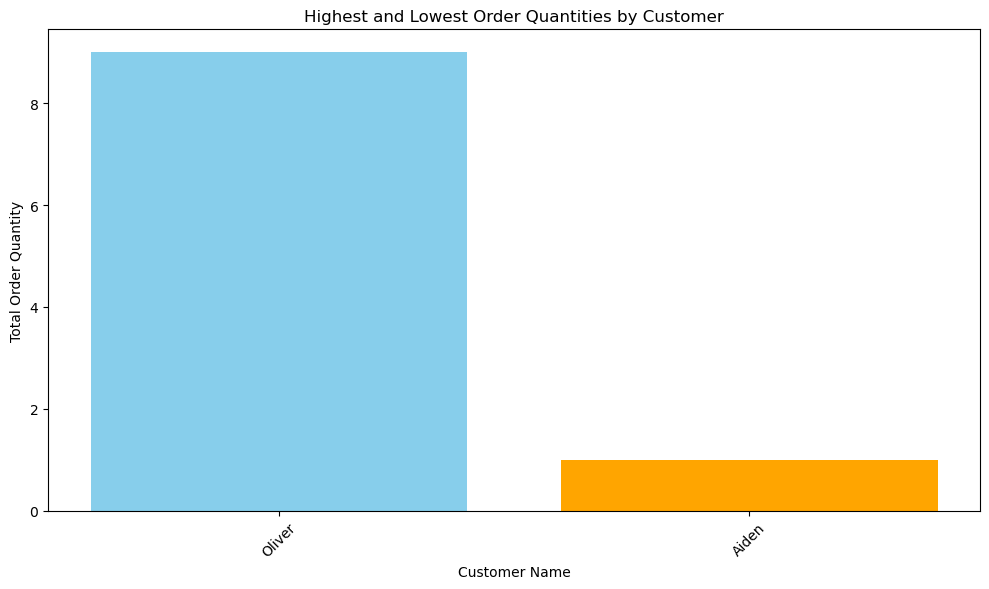

Customer with the highest order quantity: Oliver
Highest order quantity: 9.0
Customer with the lowest order quantity: Aiden
Lowest order quantity: 1.0


In [90]:
# Merge order_data with customer_data on 'customer_id'
merged_data = pd.merge(order_data, customer_data, on='customer_id')

# Group merged data by customer name and sum the quantities
customer_quantity_sold = merged_data.groupby('name')['quantity'].sum()

# Identify customer with the highest order quantity
highest_quantity_customer = customer_quantity_sold.idxmax()
highest_quantity = customer_quantity_sold.max()

# Identify customer with the lowest order quantity
lowest_quantity_customer = customer_quantity_sold.idxmin()
lowest_quantity = customer_quantity_sold.min()

# Create a bar plot for highest and lowest order quantities by customer
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_customer, lowest_quantity_customer], [highest_quantity, lowest_quantity], color=['skyblue', 'orange'])
plt.title('Highest and Lowest Order Quantities by Customer')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Customer with the highest order quantity:", highest_quantity_customer)
print("Highest order quantity:", highest_quantity)
print("Customer with the lowest order quantity:", lowest_quantity_customer)
print("Lowest order quantity:", lowest_quantity)


# Determine the most preferred payment modes

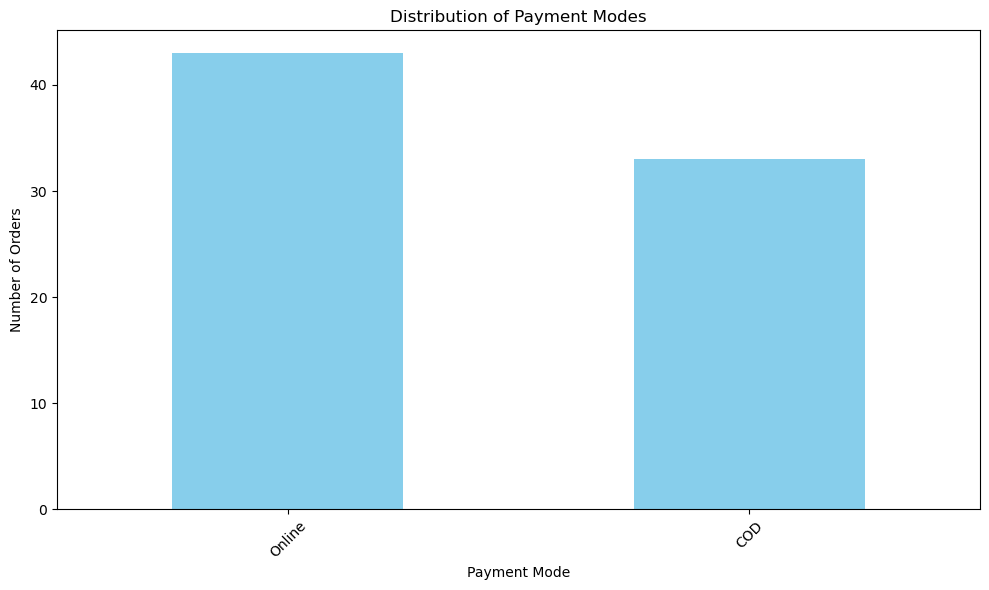

Most preferred payment mode: Online


In [91]:
# Group orders by payment mode and count the number of orders for each mode
payment_mode_counts = order_data['payment_mode'].value_counts()

# Create a bar plot to visualize the distribution of payment modes
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the most preferred payment mode
most_preferred_payment_mode = payment_mode_counts.idxmax()
print("Most preferred payment mode:", most_preferred_payment_mode)


# ● Time-based Analysis:

# ○ Month wise total sales.

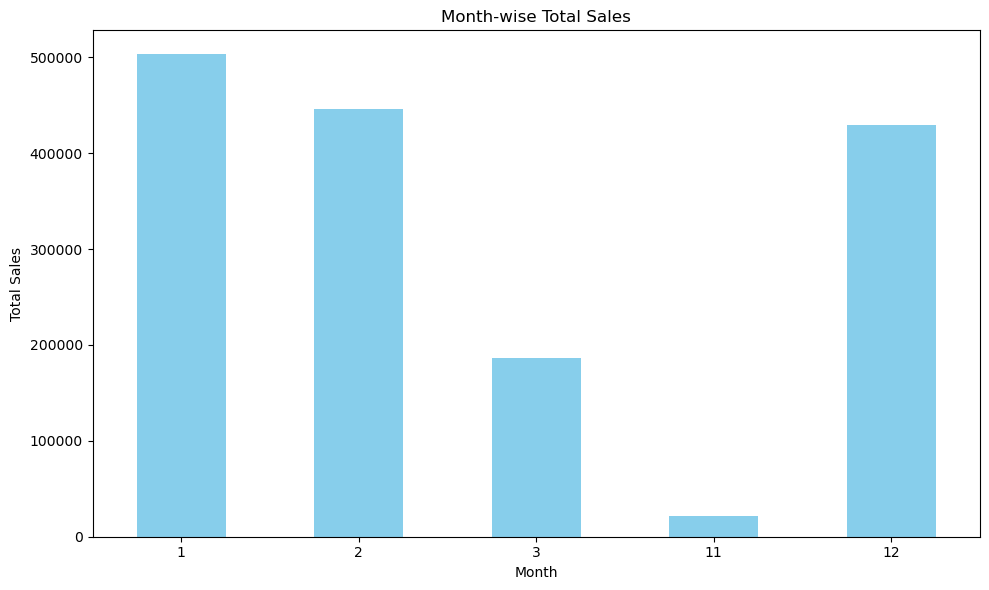

In [95]:
# Convert order_date to datetime if it's not already in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Extract month from order_date
order_data['order_month'] = order_data['order_date'].dt.month

# Group orders by month and calculate total sales for each month
monthly_sales = order_data.groupby('order_month')['total_price'].sum()

# Create a bar plot to visualize month-wise total sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Month and year wise total sales


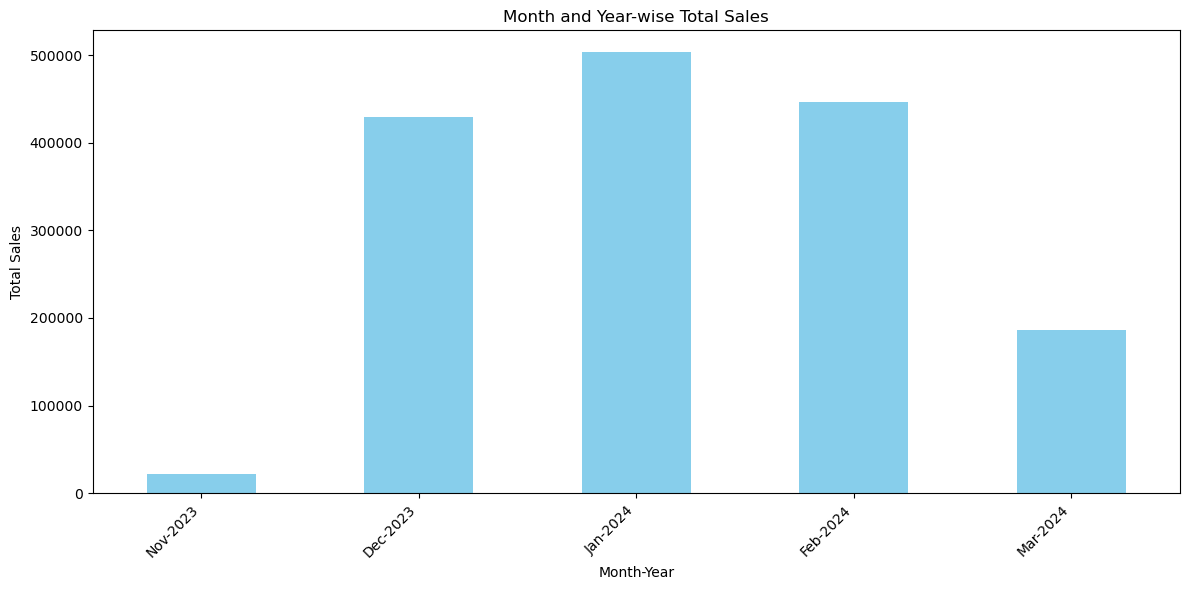

In [112]:
# Group orders by month and year and calculate total sales for each combination
monthly_sales = order_data.groupby(['order_year', 'order_month'])['total_price'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue')

# Set x-axis labels to month and year combinations
labels = [f"{calendar.month_abbr[month]}-{year}" for year, month in monthly_sales.index]
plt.xticks(range(len(monthly_sales)), labels, rotation=45, ha='right')

plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


# Identify peak order date

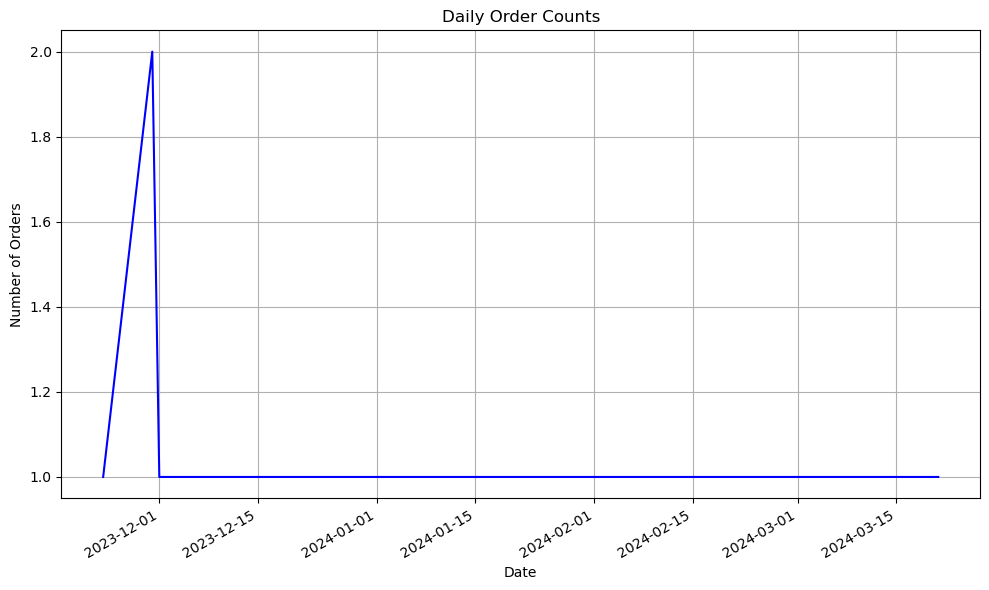

In [98]:
# Convert order_date to datetime if it's not already in datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Group orders by order date and count the number of orders for each date
daily_orders = order_data.groupby('order_date').size()

# Plot the daily order counts
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', color='blue')
plt.title('Daily Order Counts')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


# Geographical Analysis:


# ○ Explore the distribution of customers across different cities.

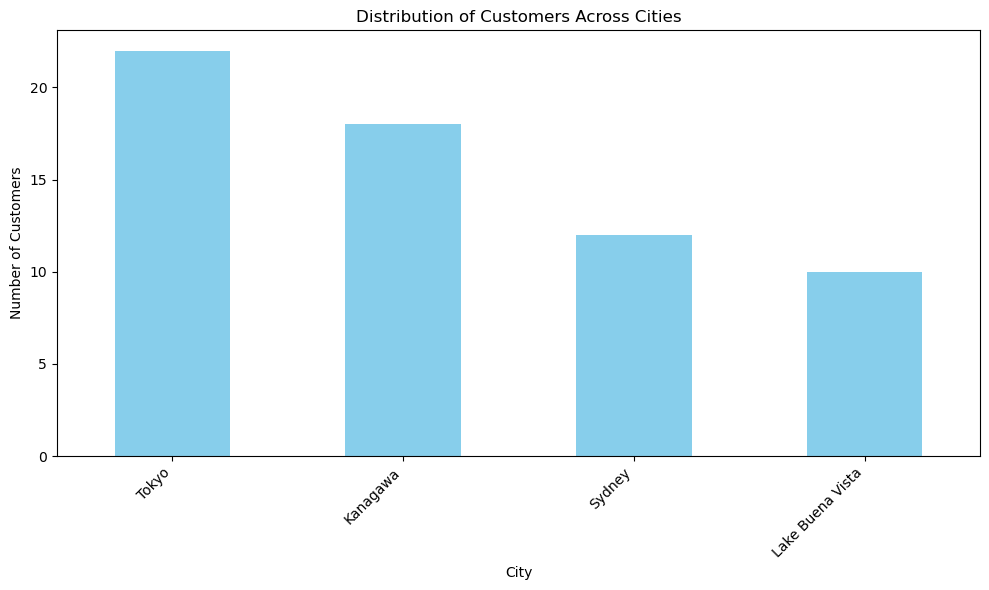

In [99]:
# Group customers by city and count the number of customers in each city
city_distribution = customer_data['city'].value_counts()

# Plot the distribution of customers across different cities
plt.figure(figsize=(10, 6))
city_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [101]:
print(customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

# Analyze whether certain products or categories are more popular in a specific city.

In [103]:
# Choose a specific city
city_name = 'Tokyo'

# Merge order details with products data to get product categories
city_order_details = pd.merge(order_details_data, products_data, on='product_id')

# Filter order details data to include only orders made by customers in the chosen city
city_order_details = city_order_details[city_order_details['city'] == city_name]

# Group by product category and count the number of orders for each category
category_distribution = city_order_details['category'].value_counts()

# Plot the distribution of orders across product categories
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title(f'Distribution of Orders Across Product Categories in {city_name}')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'products_data' is not defined

# Product Performance:
○ Identify the best-selling products.

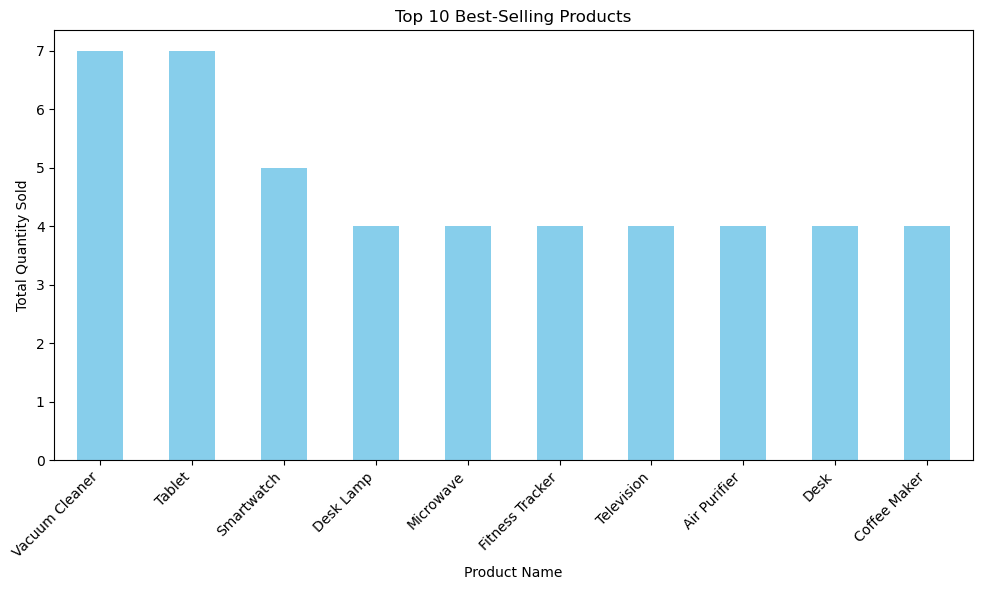

In [107]:
# Merge order_details_data with product_data to get product names
merged_data = pd.merge(order_details_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold
top_products = product_quantity_sold.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Identify top 10 slow-moving products based on low sales.

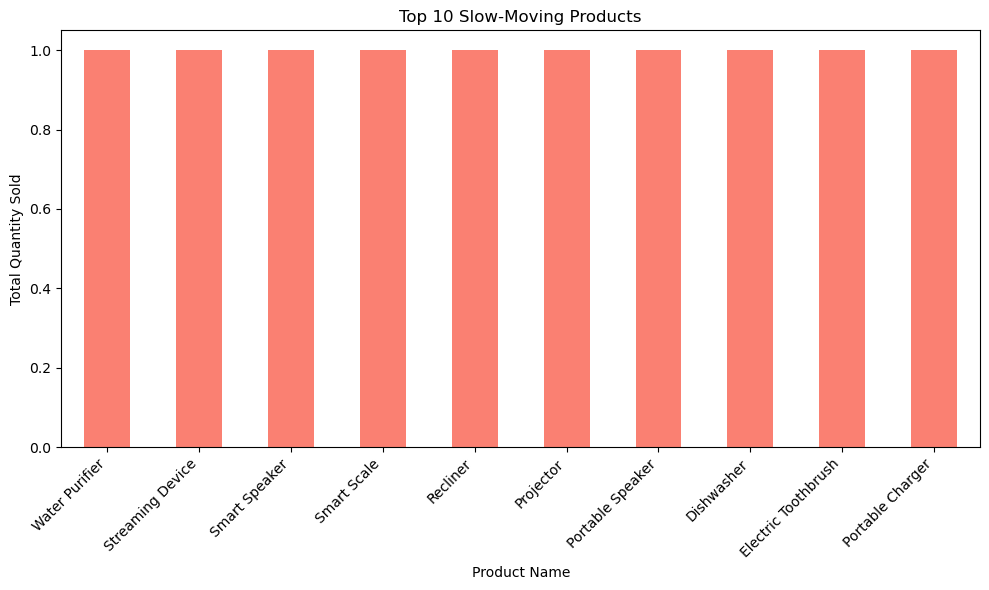

In [108]:
# Merge order_details_data with product_data to get product names
merged_data = pd.merge(order_details_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities
product_quantity_sold = merged_data.groupby('product_name')['quantity'].sum()

# Sort products based on total quantity sold in ascending order
slowest_products = product_quantity_sold.sort_values().head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
slowest_products.plot(kind='bar', color='salmon')
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Payment Analysis:
○ Display successful and pending payments order counts.

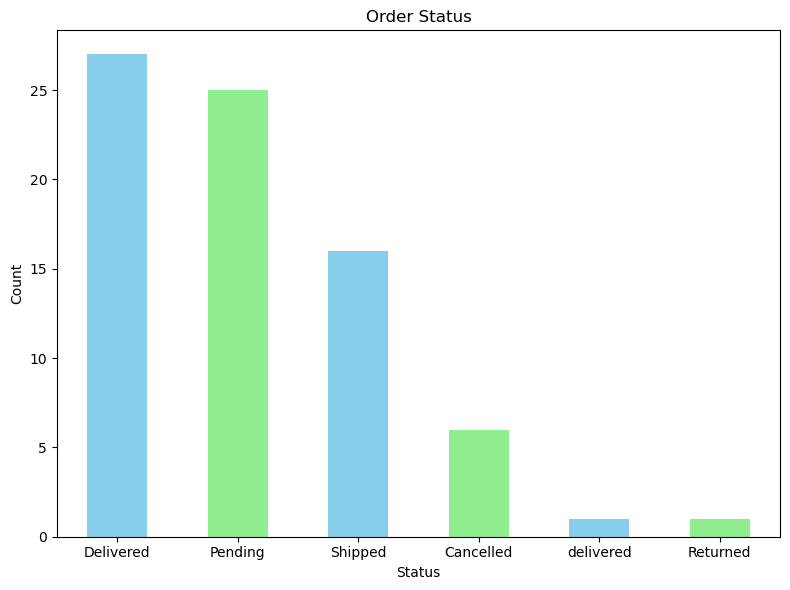

In [109]:
# Group orders by order status and count the occurrences
order_status_counts = order_data['order_status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
